# Introduction
Heart Disease continues to prevail in the modern society and this can be attributed to many factors. According to the WHO over 10 million lives are lost each year as a result of Heart Diseases. Early detection of the disease will increase the life expectancy of the victims as a result of change in lifestyle and better medical treatment.

# Data Set
The dataset is taken from Kaggle and it is for a study of residents in Framingham, Massachusetts. The data set shows a 10 year risk of either having or not having Coronary Heart Disease in the future. The dataset includes over 4000 records with 15 attributes. 
The attributes are grouped into 3 main categories namely
(1) Demographic: The sex of the person(Male or Female), age of the person
(2) Behavorial: Whether the person smokes (currentSmoker) or not, 1 representing a smoker and 0 representing non smoker and if yes how many sticks they smoke a day on average (cigsPerDay).
(3) Medical attributes: this include both historic and current medical conditions 
    (i) Medical (historic) : Whether the person was on blood pressure medication in the past(BPMeds) with 1 being "yes" and 0 being "no". Also whether or not a person had stroke in the past(prevalentStroke). Whether person is hypertensive(prevalentHyp) or not (1 being "yes" and 0 being a "no". Lastly whether or not the person had diabetes(diabetes).
    (ii) Medical (current) : The current medical attributes are continous in nature. It include the cholestrol level(totChol), systolic blood pressure (sysBP), diastolic blood pressure (diaBP), Body Mass Index (BMI), heart rate(heartRate), glucose level(glucose)
 Education was an attribute but will be removed because it is really not a strong factor to be considered.
 
 The target values is whether a person is at risk of getting Coronary Heart Disease with 1 being a "yes" and 0 being a "no".

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics

%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv("framingham.csv")

data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [4]:
# Removing Education Column
data.drop(['education'],axis=1,inplace=True)
data.tail()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [5]:
# Checking the null values
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
# Checking NUll Values
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print(count , ' number of rows have missing values')
print('This account for',round((count/len(data.index))*100), 'percent of the dataset.')

489  number of rows have missing values
This account for 12 percent of the dataset.


In [8]:
# Dropping Null Values
data.dropna(axis=0,inplace=True)
data.tail()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [9]:
#Checking number of null values after removing them
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print(count , ' number of rows have missing values')

0  number of rows have missing values


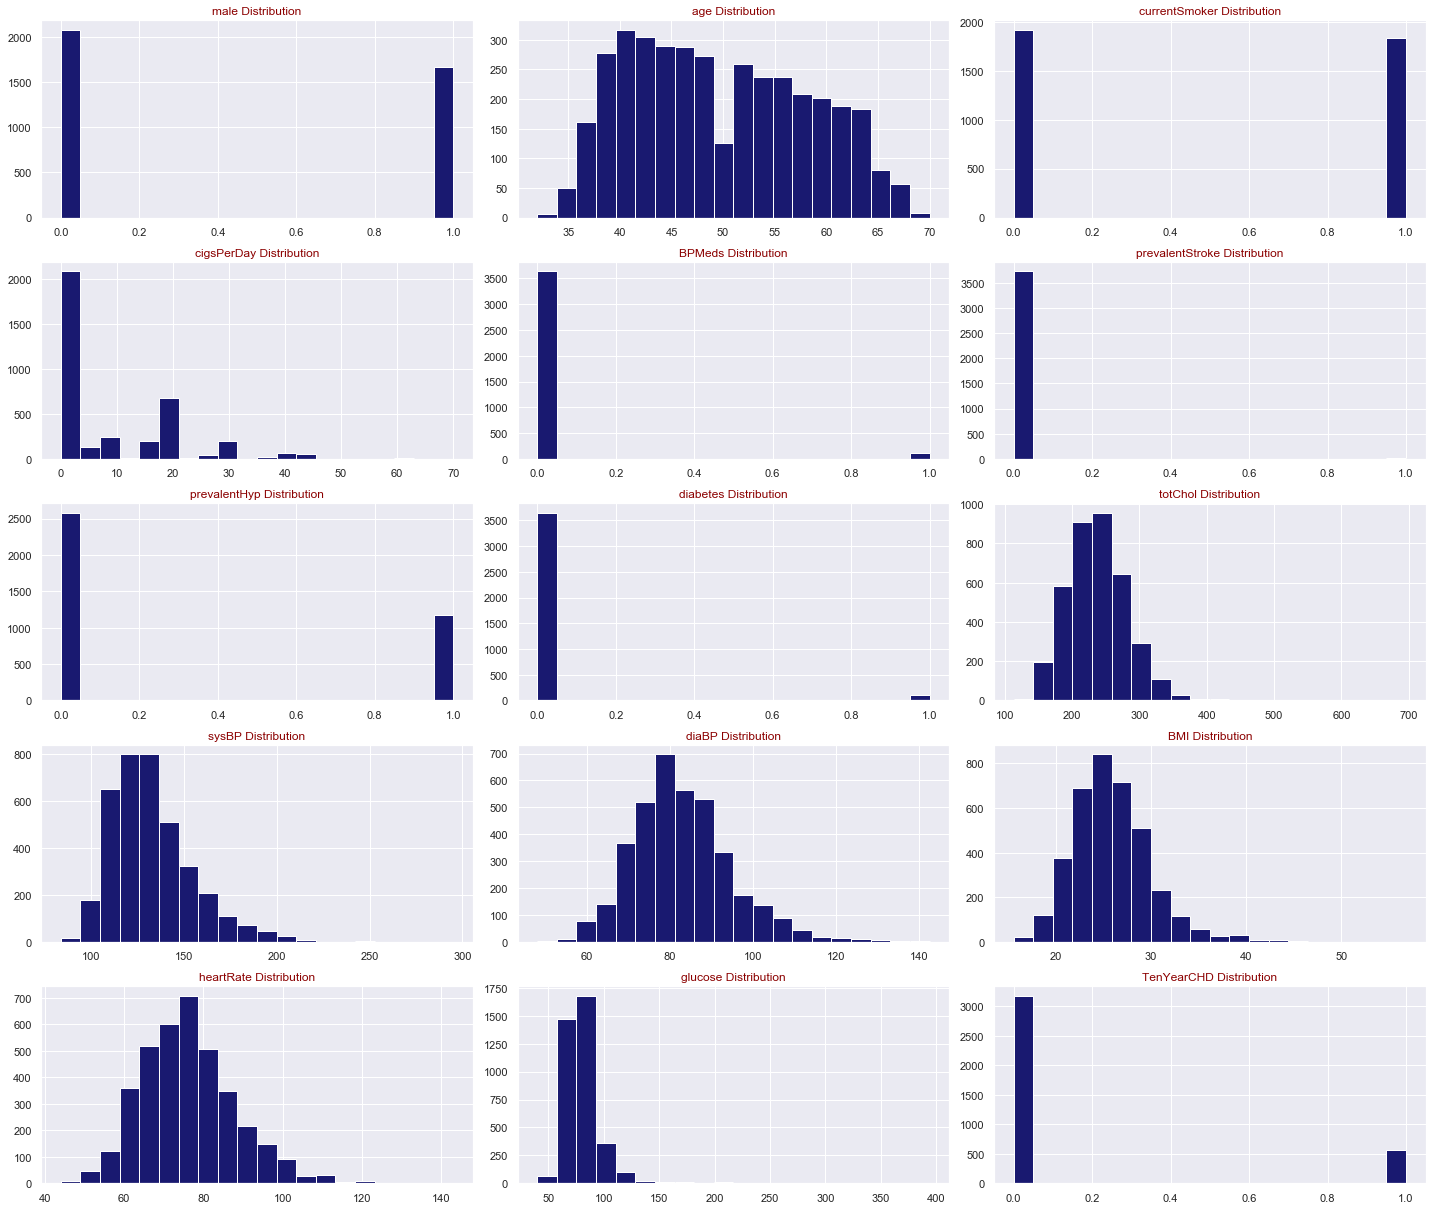

In [10]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,6,3)

In [11]:
data.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

From the graph 3179 people have no heart disease but 572 people do have it


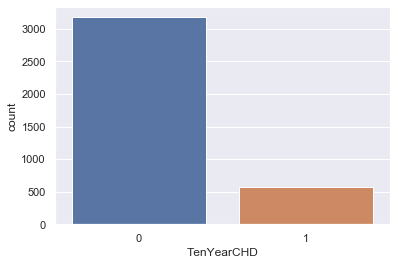

In [15]:
# Number of people with and without heart disease
sns.countplot(x='TenYearCHD',data=data)
print("From the graph 3179 people have no heart disease but 572 people do have it")

In [16]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Methods
The methods that are going to be employed are 
(1) Logistic Regression
(2) K Nearest Neighbors . Logistic regression is used to analyse data whose outcome is categorical in nature. This is achieved from a set of Predictor(Independent) variables.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Extracting data
X = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD']

In [28]:
#Spliting data into training and testing data
from sklearn.model_selection import train_test_split
# Making a split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [29]:
# Logistic Regression Modeling
lreg = LogisticRegression(fit_intercept=True)
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Testing the model
y_pred = lreg.predict(X_test)

In [40]:
# Accuracy of model
acc = metrics.accuracy_score(y_test,y_pred)
print("The accuracy of the model is ", round(acc * 100), "percent.")

The accuracy of the model is  85.0 percent.


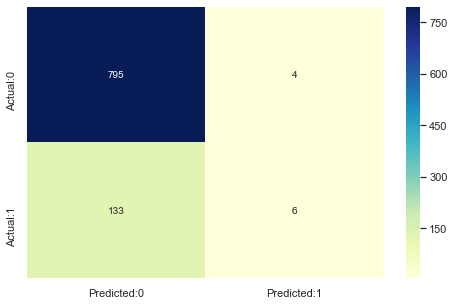

In [42]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

From the Confusion matrix above 799 predictions were made correctly by the model (795 for predict 0 and 4 for predict 1).
Also 139 predictions were wrong(133 were supposed to be predict 1 but were predicted as 0 and 6 were supposed to be predicted as 0 and were predicted as 1. Where 0 means no Coronary Heart Disease and 1 mean presence of Coronary Heart Disease.

In [43]:
# K Nearest Neighbor Modeling
kNear = KNeighborsClassifier(n_neighbors=5)
kNear.fit(X_train, y_train) 
y_pred = kNear.predict(X_test) 

In [46]:
# Checking accuracy of K Nearest Model
acc2 = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the K Nearest Model considering 5 neigbors is ", round(acc2 * 100), "percent.")

The accuracy of the K Nearest Model considering 5 neigbors is  84.0 percent.


In [52]:
kNear= KNeighborsClassifier(n_neighbors=1)
kNear.fit(X_train, y_train) 
y_pred = kNear.predict(X_test)
acc3 = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the K Nearest Model considering 1 neigbor is ", round(acc3 * 100), "percent.")


The accuracy of the K Nearest Model considering 1 neigbor is  78.0 percent.


In [53]:
# try K=1 through K=25 and record testing accuracy 
k_range = range(1, 26)
# We can create Python dictionary using [] or dict() 
scores = [] 
# We use a loop through the range 1 to 26 
# We append the scores in the dictionary
for k in k_range:
    kNear = KNeighborsClassifier(n_neighbors=k)
    kNear.fit(X_train, y_train)
    y_pred = kNear.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred)) 
print(scores)


[0.7761194029850746, 0.8304904051172708, 0.82409381663113, 0.8390191897654584, 0.8400852878464818, 0.8464818763326226, 0.8443496801705757, 0.847547974413646, 0.8454157782515992, 0.8518123667377399, 0.8539445628997868, 0.8539445628997868, 0.8539445628997868, 0.8528784648187633, 0.8539445628997868, 0.8528784648187633, 0.8550106609808102, 0.8528784648187633, 0.8528784648187633, 0.8539445628997868, 0.8518123667377399, 0.8528784648187633, 0.8507462686567164, 0.8518123667377399, 0.8518123667377399]


Text(0, 0.5, 'Testing Accuracy')

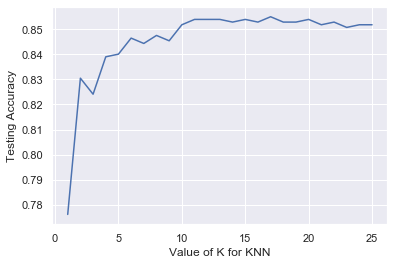

In [54]:
# allow plots to appear within the notebook
%matplotlib inline 
# plot the relationship between K and testing accuracy 
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


# Results

The training accuracy increase with increase in complexity of th model, therefore a higher k neigbors a higher accuracy.
From the two techniques used, the logistic regression provides a more accurate model on the test set, with 85% accuracy. The KNN models used provided different accuracy levels, depending on the number of neigbors employed, with 5 neigbors producing an accuracy of 84% and the 1 neigbor producing a lower accuracy of approximately 78%. This shows that from the above techniques the most accurate was the logistic regression.

# Conclusion
Men are more likely to have heart disease compared to women. Age,number of cigarettes smoked per day and systolic Blood Pressure are positively related to the chances of having heart disease. 